In [14]:
import matplotlib.pyplot as plt
from collections import Counter

In [15]:
class KamasutraCipher:
    def __init__(self):
        
        self.key = "GJMQTVZADIORUBCEFHKLNPSWXY"
        self.alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

        self.encrypt_map = {}
        self.decrypt_map = {}
        mid = len(self.key) // 2
        first_half = self.key[:mid]
        second_half = self.key[mid:]
        
        for i in range(mid):
            self.encrypt_map[first_half[i]] = second_half[i]
            self.encrypt_map[second_half[i]] = first_half[i]
            self.decrypt_map[second_half[i]] = first_half[i]
            self.decrypt_map[first_half[i]] = second_half[i]

    def encrypt(self, plaintext):
        ciphertext = ""
        for char in plaintext.upper():
            if char in self.encrypt_map:
                ciphertext += self.encrypt_map[char]
            else:
                ciphertext += char 
        return ciphertext

In [16]:
class ModularCipher:
    def __init__(self):
        self.alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    
    def encrypt(self, plaintext):
        ciphertext = ""
        for char in plaintext.upper():
            if char in self.alphabet:
                x = self.alphabet.index(char)
                encrypted_value = (7 * x + 6) % 26
                ciphertext += self.alphabet[encrypted_value]
            else:
                ciphertext += char
        return ciphertext

In [17]:
class FrequencyAnalyzer:
    def __init__(self):
        self.alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    
    def count_frequencies(self, text):
        text = text.upper()
        count = Counter()
        for char in text:
            if char in self.alphabet:
                count[char] += 1
        return count
    
    def plot_histogram(self, ciphertext, title):
        counts = self.count_frequencies(ciphertext)
        total = sum(counts.values())
        
        letters = list(self.alphabet)
        frequencies = [counts.get(ch, 0) / total * 100 if total > 0 else 0 for ch in letters]
        
        plt.figure(figsize=(14, 6))
        bars = plt.bar(letters, frequencies, color='skyblue', edgecolor='black')
        
        # Add percentage labels on top of bars
        for bar, freq in zip(bars, frequencies):
            if freq > 0:
                plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                         f'{freq:.2f}%', ha='center', va='bottom', fontsize=9)
        
        plt.title(title, fontsize=16)
        plt.xlabel('Letters', fontsize=12)
        plt.ylabel('Frequency (%)', fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()


IT32023 - Cryptography Assignment (OOP)
Plaintext: Thanushan Vimalanathan

[a] Kamasutra Cipher:
    Ciphertext: HTNAYITNA KSENZNANHTNA

[b] Modular Cipher (f(x) = (7x + 6) mod 26):
    Ciphertext: JDGTQCDGT XKMGFGTGJDGT

[c] Frequency Analysis:
    Kamasutra Ciphertext Frequencies:
        A: 4
        E: 1
        H: 2
        I: 1
        K: 1
        N: 6
        S: 1
        T: 3
        Y: 1
        Z: 1

    Modular Ciphertext Frequencies:
        C: 1
        D: 3
        F: 1
        G: 6
        J: 2
        K: 1
        M: 1
        Q: 1
        T: 4
        X: 1


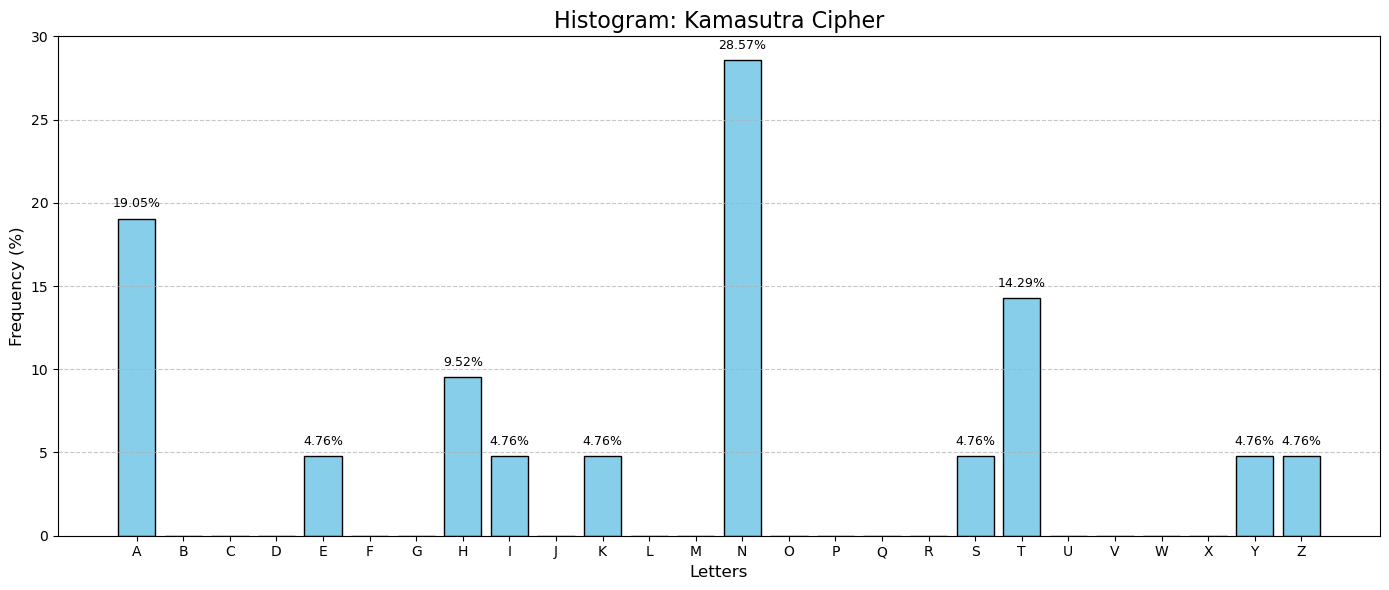

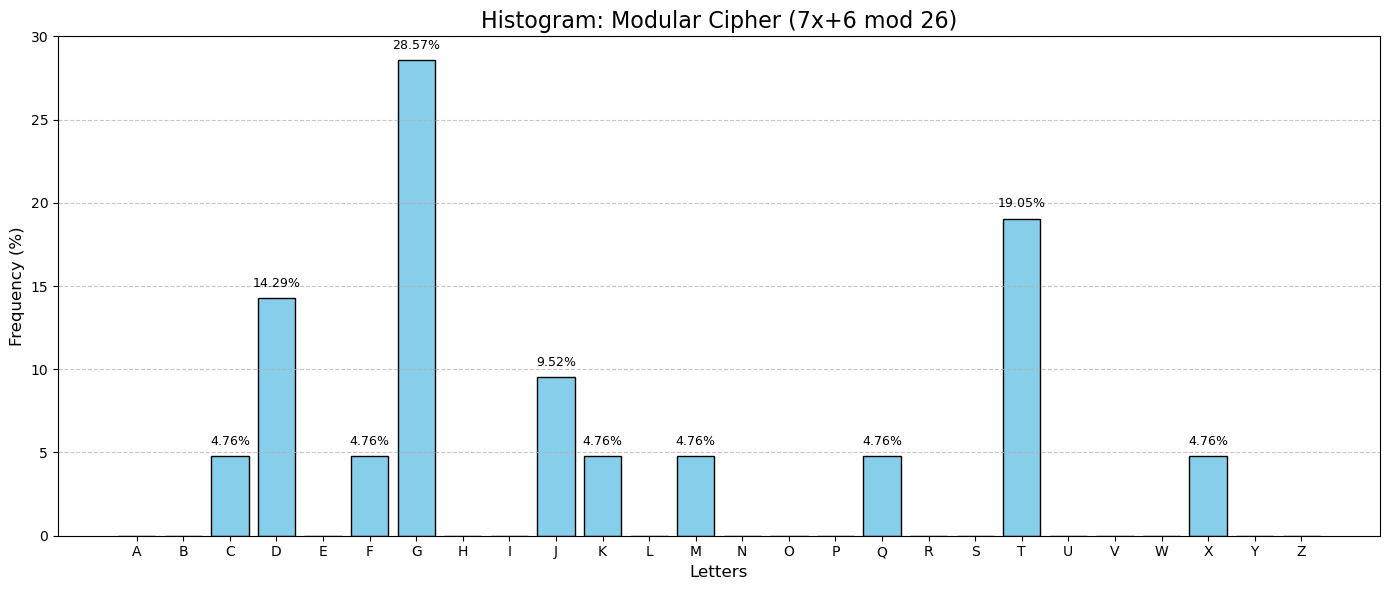

In [18]:
if __name__ == "__main__":
    # Plaintext: Your full name (replace with your actual name)
    plaintext = "Thanushan Vimalanathan"
    print("=" * 50)
    print("IT32023 - Cryptography Assignment (OOP)")
    print("=" * 50)
    print(f"Plaintext: {plaintext}\n")
    
    # ===== Part (a): Kamasutra Cipher =====
    kamasutra = KamasutraCipher()
    cipher_a = kamasutra.encrypt(plaintext)
    print("[a] Kamasutra Cipher:")
    print(f"    Ciphertext: {cipher_a}\n")
    
    # ===== Part (b): Modular Cipher =====
    modular = ModularCipher()
    cipher_b = modular.encrypt(plaintext)
    print("[b] Modular Cipher (f(x) = (7x + 6) mod 26):")
    print(f"    Ciphertext: {cipher_b}\n")
    
    # ===== Part (c): Frequency Analysis & Histograms =====
    analyzer = FrequencyAnalyzer()
    
    print("[c] Frequency Analysis:")
    print("    Kamasutra Ciphertext Frequencies:")
    freq_a = analyzer.count_frequencies(cipher_a)
    for letter in "ABCDEFGHIJKLMNOPQRSTUVWXYZ":
        if freq_a.get(letter, 0) > 0:
            print(f"        {letter}: {freq_a[letter]}")
    
    print("\n    Modular Ciphertext Frequencies:")
    freq_b = analyzer.count_frequencies(cipher_b)
    for letter in "ABCDEFGHIJKLMNOPQRSTUVWXYZ":
        if freq_b.get(letter, 0) > 0:
            print(f"        {letter}: {freq_b[letter]}")
    
    # Plot histograms
    analyzer.plot_histogram(cipher_a, "Histogram: Kamasutra Cipher")
    analyzer.plot_histogram(cipher_b, "Histogram: Modular Cipher (7x+6 mod 26)")